In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings # ignore warnings 
warnings.filterwarnings('ignore') 

In [3]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Scaling the data would be useful to deal with features like fare and age which are continuous compared to other features mostly being categorical. The fare is rightly skewed with a good margin. (mean greater than the median)

# Exploratory Data Analysis

# Sparse Data

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1, 'Train Data Plot')

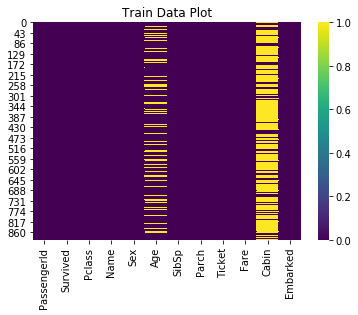

In [12]:
sns.heatmap(train.isnull(),cmap='viridis')
plt.title('Train Data Plot')

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5, 1, 'Test Data Plot')

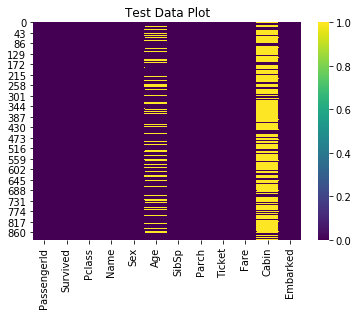

In [13]:
sns.heatmap(train.isnull(),cmap='viridis')
plt.title('Test Data Plot')

The age and cabin are the dominant features which have the maximum sparse data. Cabin having the maximum percentage of sparse data, dealing with this feature would require further information as any wrong inputs would negatively impact the model. 

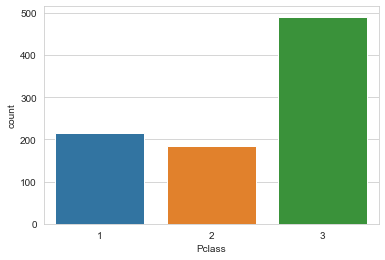

In [17]:
sns.set_style('whitegrid')
sns.countplot(train['Pclass'])

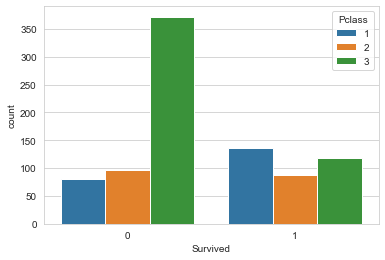

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

The passengers who did not survive the ordeal have a large majority of them belonging to Pclass-3. The passengers who did survive have maximum passenger from Pclass 1 which seems close to the other classes in the plot but considering the distribution of passsengers in terms of the class it is interesting that class 1 dominates the survival.

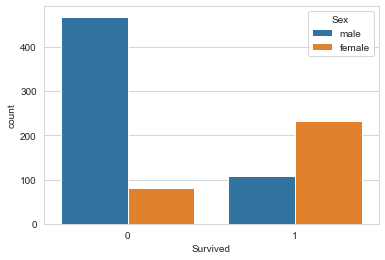

In [18]:
sns.countplot(x='Survived', hue='Sex',data=train)

Sex looks like a good feature for spilitig the data as to who survived. Females have a high survival rate compared to the males. 

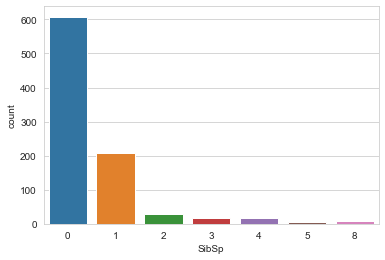

In [23]:
sns.countplot(train['SibSp'])

Maximum passengers were travelling without any siblings or spouse on the titanic as further distribution as to the age group in terms of class would be a helpful identifier

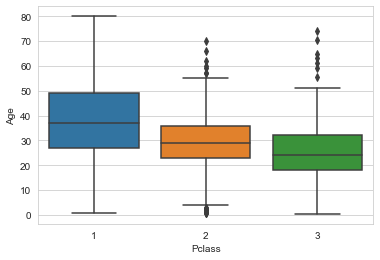

In [24]:
sns.boxplot(x='Pclass',y='Age',data=train)

So the Pclass-3 has the youngest passengers the major age group between 18-32. The Pclass1 has the oldest passengers ranging from 28-50 averaging at around 40.  

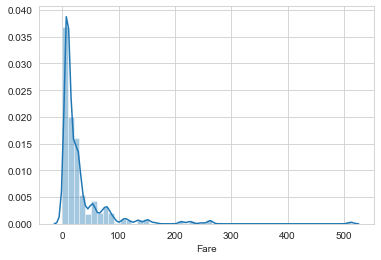

In [35]:
sns.distplot(train['Fare'])

Rightly skewed data, which goes up till 500

In [40]:
train[train['Pclass']==1]['Fare'].max()

512.3292

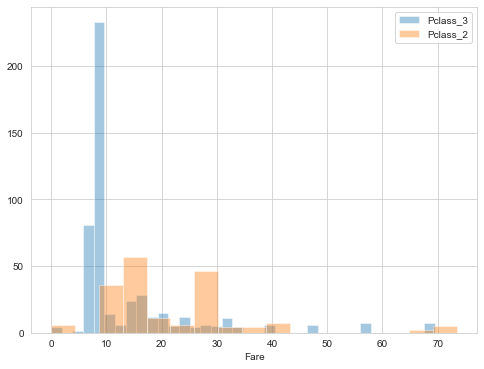

In [50]:
plt.figure(figsize=(8,6))
sns.distplot(train[train['Pclass']==3]['Fare'],kde=False, label='Pclass_3')
sns.distplot(train[train['Pclass']==2]['Fare'],kde =False, label= 'Pclass_2')
plt.legend()

So the fare between the two classes is not uniformly distributed so creating a range doesnt make sense. The fare is as per the family size. Fare seems irregular but if it is claculated for the whole family, dividing the fare by the family size would give us the calculated fare which could be helpful.

# Data Cleaning

lets start with age

# Age

In [26]:
print(train[train['Pclass']==1]['Age'].mean())
print(train[train['Pclass']==2]['Age'].mean())
print(train[train['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


Using the mean of age groups in various Pclass's to fill the sparse data in the feature.

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

Applying the function on both train and test data

In [28]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [29]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

# Embarked

In [30]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

So the S (Southamptom) is the popular destination but lets see further as to what th other features for the null values

In [31]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Both the passengers belong to Pclass 1 and both survived plus they are female, so seems quite likely. 

In [32]:
train[train['Pclass']==1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

So Southamptom is the safest bet for the sparse data

In [34]:
train['Embarked'].fillna('S', inplace = True)

# Fare

Only 1 null values values filling it with the median 

In [51]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Cabin

Filling null data as N 

In [122]:
train['Cabin'].fillna('N', inplace = True)

Using the Cabins letters for A,B,C and so on to get useful data from feature.

In [123]:
train['Cabin'] = train['Cabin'].apply(lambda x: x[0])

In [124]:
test['Cabin'].fillna('N', inplace = True)

In [125]:
test['Cabin'] = test['Cabin'].apply(lambda x:x[0])

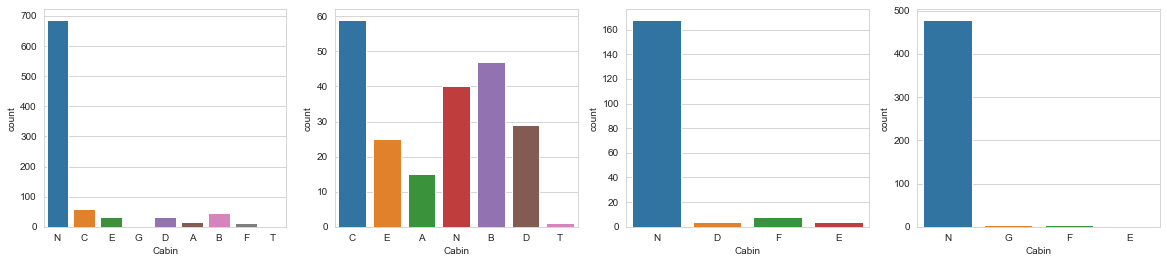

In [126]:
fig, (ax0, ax1, ax2,ax3) = plt.subplots(ncols=4, figsize = (20,4)) 
sns.countplot(train['Cabin'],ax=ax0)
sns.countplot(train[train['Pclass']==1]['Cabin'],ax=ax1)
sns.countplot(train[train['Pclass']==2]['Cabin'],ax=ax2)
sns.countplot(train[train['Pclass']==3]['Cabin'],ax=ax3)

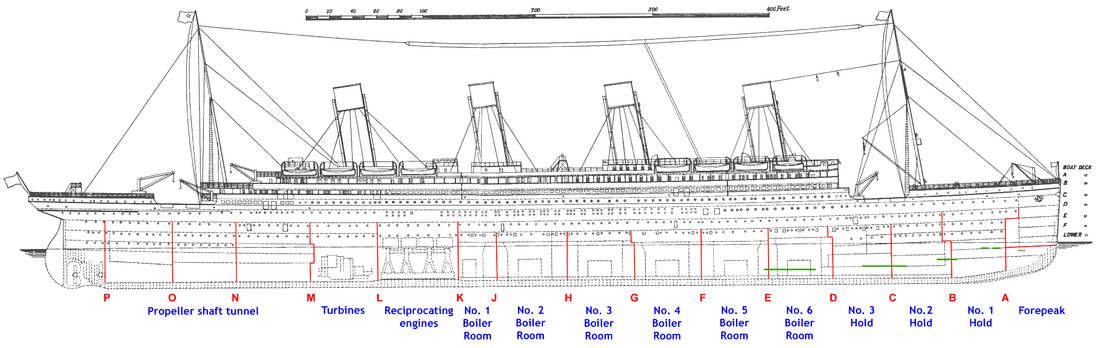

From the layout it makes sense that the 1st class passegers are closer to the viewing decks and had easy accesibilty to life boats. As compared to 3rd class who were at lower decks and were further away from the main deck.

In [127]:
train.groupby('Cabin')['Age'].mean().sort_values()

Cabin
G    14.750000
F    20.730769
N    27.290757
B    35.085106
C    36.346102
E    37.828125
D    38.969697
A    43.466667
T    45.000000
Name: Age, dtype: float64

creating a function for filling the sparse data in cabin feature as per mean of age for differnt cabins

In [128]:
def cabin_estimator(cols):
    cabin = cols[0]
    i = cols[1]
    if cabin == 'N':
        a=0
        if i<16:
            a = "G"
        elif i>=16 and i<32:
            a = "F"
        elif i>=32 and i<35:
            a = "B"
        elif i>=35 and i<36:
            a = "C"
        elif i>= 36 and i<37:
            a = "E"
        elif i>= 37 and i<38:
            a = "D"
        elif i>=38 and i<44:
            a = 'A'
        else:
            a = "T"
        return a
    else:
        return cabin

In [129]:
train['Cabin'] = train[['Cabin', 'Age']].apply(cabin_estimator, axis=1)

In [132]:
test['Cabin'] = test[['Cabin', 'Age']].apply(cabin_estimator, axis=1)

# Feature Engineering

# Name

In [133]:
train['Name']=train['Name'].apply(lambda x: x.split(',')[1].split('.')[0])

In [134]:
test['Name']=test['Name'].apply(lambda x: x.split(',')[1].split('.')[0])

In [135]:
def name_map(title):
    if title in [' Don', ' Major', ' Capt', ' Jonkheer', ' Rev', ' Col',' the Countess',' Mlle', ' Ms', ' Mme',' Lady',' Dona',' Sir',' Dr']:
        return ' Other'
    else:
        return title

In [136]:
train['Name'] = train['Name'].apply(lambda x: name_map(x))

In [137]:
test['Name'] = test['Name'].apply(lambda x: name_map(x))

# Family Size

In [138]:
def family(cols):
    sibsp = cols[0]
    parch = cols[1]
    
    final = sibsp + parch + 1
    return final

In [139]:
train['Familysize'] = train[['SibSp','Parch']].apply(family, axis=1)

In [140]:
test['Familysize'] = test[['SibSp','Parch']].apply(family, axis=1)

# Alone

In [141]:
def alone(a):
    if a == 1:
        return 1
    else:
        return 0

In [143]:
train['Alone'] = train['Familysize'].apply(alone)

In [144]:
test['Alone'] = test['Familysize'].apply(alone)

# Calculated Fare

In [145]:
train['Fare_cal'] = train['Fare']/train['Familysize']

In [146]:
test['Fare_cal'] = test['Fare']/test['Familysize']

# Coverting Categorical Columns

# Pclass

In [147]:
def class_type(a):
    if a == 1:
        return 'class_1'
    elif a == 2:
        return 'class_2'
    else:
        return 'class_3'

In [148]:
train['Pclass'] = train['Pclass'].apply(class_type)

In [149]:
test['Pclass'] = test['Pclass'].apply(class_type)

In [150]:
class_train = pd.get_dummies(train['Pclass'], drop_first=True)
class_test = pd.get_dummies(test['Pclass'],drop_first=True)

In [151]:
train = pd.concat([train,class_train],axis=1)
test = pd.concat([test,class_test],axis=1)

# Sex, Embarked and name

In [152]:
sex_train = pd.get_dummies(train['Sex'],drop_first=True)
embark_train = pd.get_dummies(train['Embarked'],drop_first=True)
name_train = pd.get_dummies(train['Name'],drop_first=True)

In [153]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)
name_test = pd.get_dummies(test['Name'],drop_first=True)

In [154]:
train = pd.concat([train,sex_train,embark_train,name_train],axis=1)
test = pd.concat([test,sex_test,embark_test,name_test],axis=1)

# Cabin

In [155]:
cabin_train = pd.get_dummies(train['Cabin'], drop_first=True)
cabin_test= pd.get_dummies(test['Cabin'], drop_first=True)

In [159]:
train = pd.concat([train,cabin_train],axis=1)
test = pd.concat([test, cabin_test],axis=1)

# Scaling

In [160]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Familysize', 'Alone',
       'Fare_cal', 'class_2', 'class_3', 'male', 'Q', 'S', ' Miss', ' Mr',
       ' Mrs', ' Other', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],
      dtype='object')

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()

In [162]:
s_train = scaler.fit_transform(train[[ 'Age','Familysize', 'Alone',
       'Fare_cal', 'class_2', 'class_3', 'male', 'Q', 'S', ' Miss', ' Mr',
       ' Mrs', ' Other','B', 'C', 'D', 'E', 'F', 'G', 'T']])

In [163]:
train_scaled = pd.DataFrame(s_train, columns=[ 'Age','Familysize', 'Alone',
       'Fare_cal', 'class_2', 'class_3', 'male', 'Q', 'S', ' Miss', ' Mr',
       ' Mrs', ' Other','B', 'C', 'D', 'E', 'F', 'G', 'T'])

In [166]:
s_test = scaler.fit_transform(test[[ 'Age','Familysize', 'Alone',
       'Fare_cal', 'class_2', 'class_3', 'male', 'Q', 'S', ' Miss', ' Mr',
       ' Mrs', ' Other','B', 'C', 'D', 'E', 'F', 'G', 'T']])

In [167]:
test_scaled = pd.DataFrame(s_test, columns=[ 'Age','Familysize', 'Alone',
       'Fare_cal', 'class_2', 'class_3', 'male', 'Q', 'S', ' Miss', ' Mr',
       ' Mrs', ' Other','B', 'C', 'D', 'E', 'F', 'G', 'T'])

# Random Forest Classifier

In [168]:
X_train = train_scaled
y_train = train['Survived']

In [169]:
X_test = test_scaled

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rf = RandomForestClassifier()

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
param_grid={'n_estimators':[20,30,50,70,100],
    'max_depth':[4,6,8,10,12],
    'min_samples_leaf':[1,2,3,4,5],
     }

In [174]:
cv_rfc = GridSearchCV(estimator=rf, param_grid=param_grid)

In [175]:
cv_rfc.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [176]:
cv_rfc.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 70}

In [177]:
rfc = RandomForestClassifier(n_estimators=70, max_depth=10,min_samples_leaf=2,oob_score=True)

In [178]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

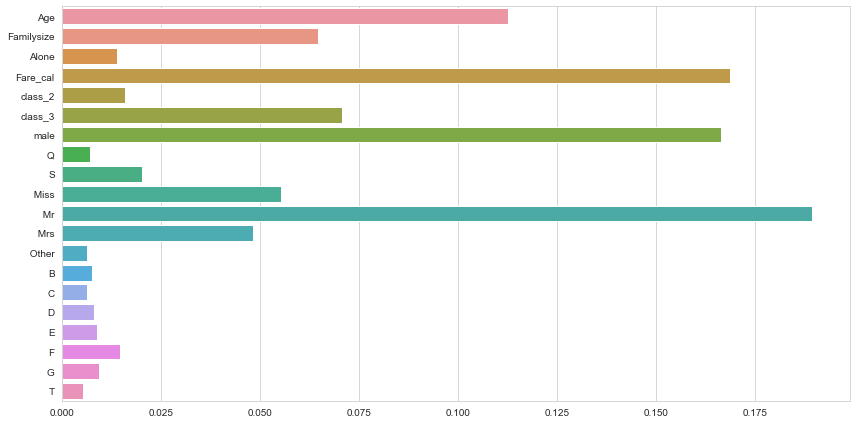

In [179]:
plt.figure(figsize=(12,6))
sns.barplot(y=X_train.columns, x=rfc.feature_importances_)
plt.tight_layout()

In [181]:
predictions_rfc = rfc.predict(X_test)

# Submission

In [182]:
submission = pd.DataFrame({
    'PassengerID': test['PassengerId'],
    'Survived': predictions_rfc
})

In [184]:
filename = 'submission.csv'

In [185]:
submission.to_csv(filename,index=False) 

Score of 79.904 on kaggle 